In [2]:
import numpy as np
from scipy.linalg import sqrtm, inv
import matplotlib.pyplot as plt

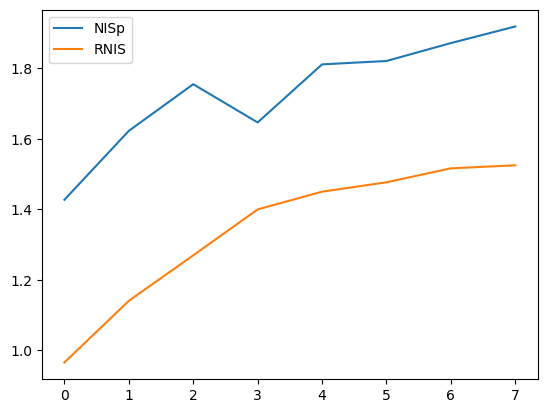

In [6]:
#test_id0 = "nn_forecast_sir_iid_NN_size9000_sigma0.03_rho-0.5_dt0.01_dmodel256_0"
#test_id1 = "nn_forecast_sir_iid_NIS_samp9000_sigma0.03_rho-0.5_dt0.01_dmodel256_0"
test_id2 = "maxei_sir_iid_maxei_NISp_samp9000_sigma0.03_rho-0.5_lam3.0_dmodel64_0"
test_id3 = "maxei_sir_iid_maxei_RNIS_samp9000_sigma0.03_rho-0.5_lam3.0_dmodel64_0"
folder_path = '../results/outputs/'
#ei_ls0 = np.load(folder_path+test_id0+"/EI.npy")
#ei_ls1 = np.load(folder_path+test_id1+"/EI.npy")
ei_ls2 = np.load(folder_path+test_id2+"/EI.npy")
ei_ls3 = np.load(folder_path+test_id3+"/EI.npy")
#plt.plot(ei_ls0, label="NN")
#plt.plot(ei_ls1, label="NIS")
plt.plot(ei_ls2, label="NISp")
plt.plot(ei_ls3, label="RNIS")
plt.legend()